## Support Vector Machines

For this project we will be exploring publicly available data from LendingClub.com. Lending Club connects people who need money
(borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a
profile of having a high probability of paying you back. We will try to create a model that will help predict this.


We will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in
full. You can download the data from here or just use the csv already provided. It's recommended you use the csv provided as it
has been cleaned of NA values.

Here are what the columns represent:
- credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
- purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase",
"small_business", and "all_other").
- int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by
LendingClub.com to be more risky are assigned higher interest rates.
- installment: The monthly installments owed by the borrower if the loan is funded.
- log.annual.inc: The natural log of the self-reported annual income of the borrower.
- dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
- fico: The FICO credit score of the borrower.
- days.with.cr.line: The number of days the borrower has had a credit line.
- revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
- revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
- inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
- delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
- pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

In [ ]:
# Open the loan_data.csv file and save it as a dataframe called loans.
loans <- read.csv("C:/Users/Dr Vandana/Documents/loan_data.csv")

In [ ]:
str(loans)

'data.frame':	9578 obs. of  14 variables:
 $ credit.policy    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ purpose          : Factor w/ 7 levels "all_other","credit_card",..: 3 2 3 3 2 2 3 1 5 3 ...
 $ int.rate         : num  0.119 0.107 0.136 0.101 0.143 ...
 $ installment      : num  829 228 367 162 103 ...
 $ log.annual.inc   : num  11.4 11.1 10.4 11.4 11.3 ...
 $ dti              : num  19.5 14.3 11.6 8.1 15 ...
 $ fico             : int  737 707 682 712 667 727 667 722 682 707 ...
 $ days.with.cr.line: num  5640 2760 4710 2700 4066 ...
 $ revol.bal        : int  28854 33623 3511 33667 4740 50807 3839 24220 69909 5630 ...
 $ revol.util       : num  52.1 76.7 25.6 73.2 39.5 51 76.8 68.6 51.1 23 ...
 $ inq.last.6mths   : int  0 0 1 1 0 0 0 0 1 1 ...
 $ delinq.2yrs      : int  0 0 0 0 1 0 0 0 0 0 ...
 $ pub.rec          : int  0 0 0 0 0 0 1 0 0 0 ...
 $ not.fully.paid   : int  0 0 0 0 0 0 1 1 0 0 ...


In [ ]:
summary(loans)

 credit.policy                 purpose        int.rate       installment    
 Min.   :0.000   all_other         :2331   Min.   :0.0600   Min.   : 15.67  
 1st Qu.:1.000   credit_card       :1262   1st Qu.:0.1039   1st Qu.:163.77  
 Median :1.000   debt_consolidation:3957   Median :0.1221   Median :268.95  
 Mean   :0.805   educational       : 343   Mean   :0.1226   Mean   :319.09  
 3rd Qu.:1.000   home_improvement  : 629   3rd Qu.:0.1407   3rd Qu.:432.76  
 Max.   :1.000   major_purchase    : 437   Max.   :0.2164   Max.   :940.14  
                 small_business    : 619                                    
 log.annual.inc        dti              fico       days.with.cr.line
 Min.   : 7.548   Min.   : 0.000   Min.   :612.0   Min.   :  179    
 1st Qu.:10.558   1st Qu.: 7.213   1st Qu.:682.0   1st Qu.: 2820    
 Median :10.929   Median :12.665   Median :707.0   Median : 4140    
 Mean   :10.932   Mean   :12.607   Mean   :710.8   Mean   : 4561    
 3rd Qu.:11.291   3rd Qu.:17.950   3rd 

Convert the following columns to categorical data using factor()
- inq.last.6mths
- delinq.2yrs
- pub.rec
- not.fully.paid
- credit.policy

In [ ]:
loans$credit.policy <- factor(loans$credit.policy)
loans$inq.last.6mths <- factor(loans$inq.last.6mths)
loans$delinq.2yrs <- factor(loans$delinq.2yrs)
loans$pub.rec <- factor(loans$pub.rec)
loans$not.fully.paid <- factor(loans$not.fully.paid)

#### EDA
Let's use ggplot 2 to visualize the data!
Create a histogram of fico scores colored by not.fully.paid

In [ ]:
library(ggplot2)

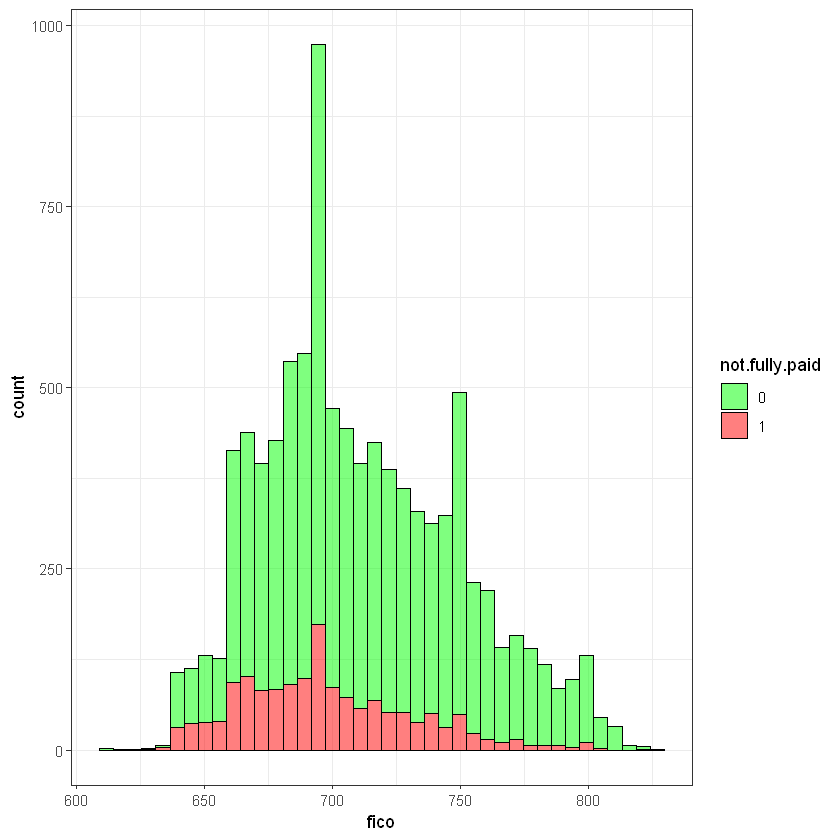

In [ ]:
pl <- ggplot(loans, aes(x=fico))
pl <- pl + geom_histogram(aes(fill = not.fully.paid), color = 'black', bins = 40, alpha = 0.5)
pl  + scale_fill_manual(values = c('green', 'red')) + theme_bw()

Create a barplot of purpose counts, colored by not.fully.paid. Use position=dodge in the geom_bar argument

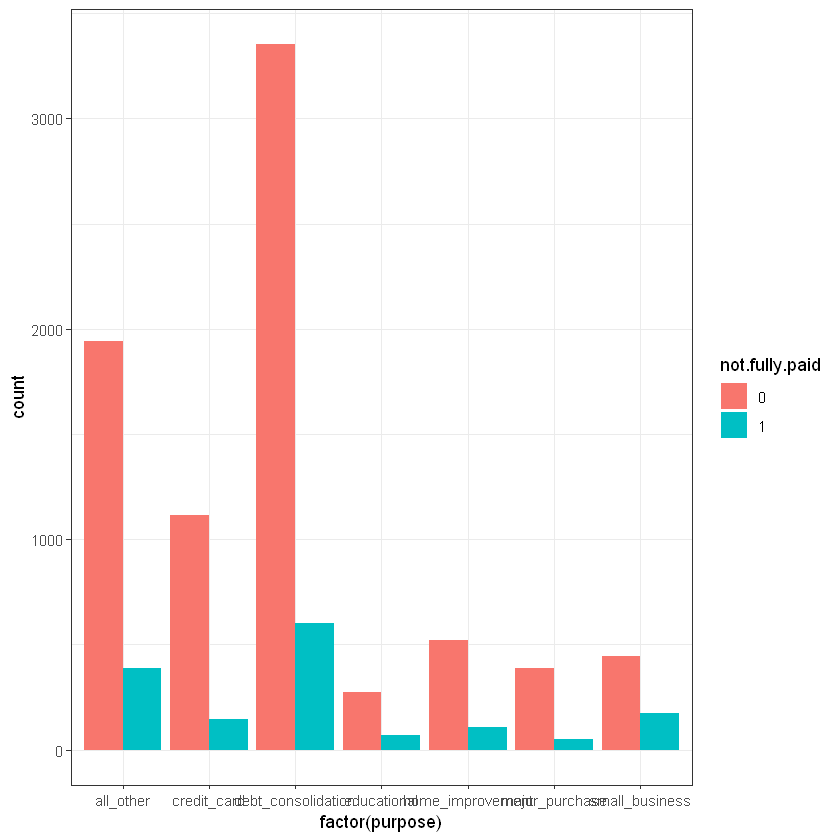

In [ ]:
pl<- ggplot(loans, aes(x=factor(purpose)))
pl <- pl + geom_bar (aes(fill = not.fully.paid), position = "dodge")
pl + theme_bw()

Create a scatterplot of fico score versus int.rate. Does the trend make sense? Play around with the color scheme if
you want.

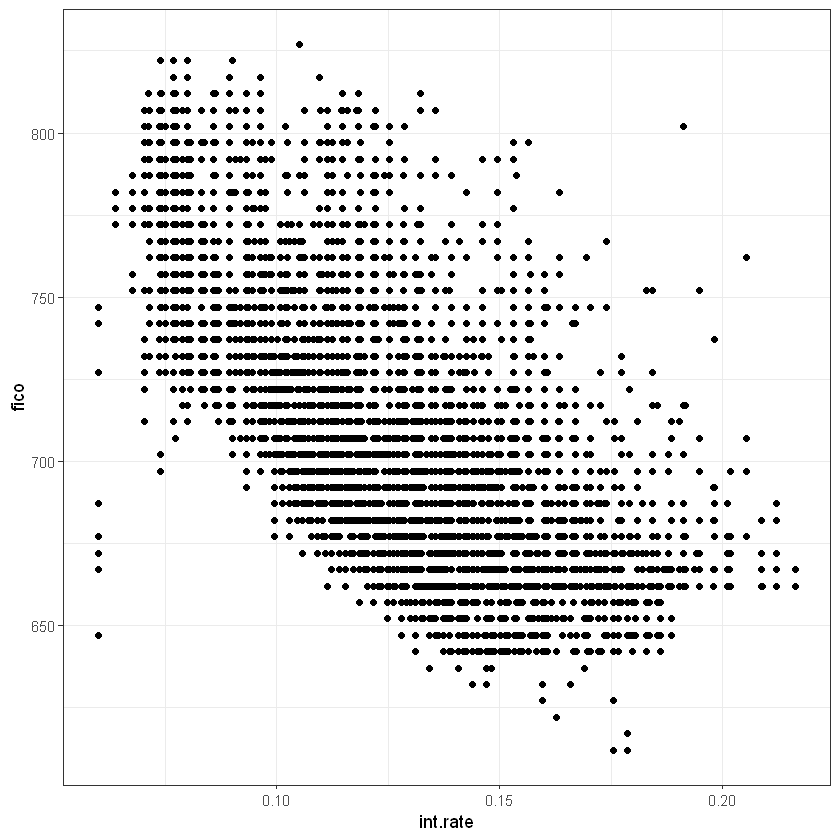

In [ ]:
ggplot(loans, aes(int.rate,fico)) + geom_point() + theme_bw()

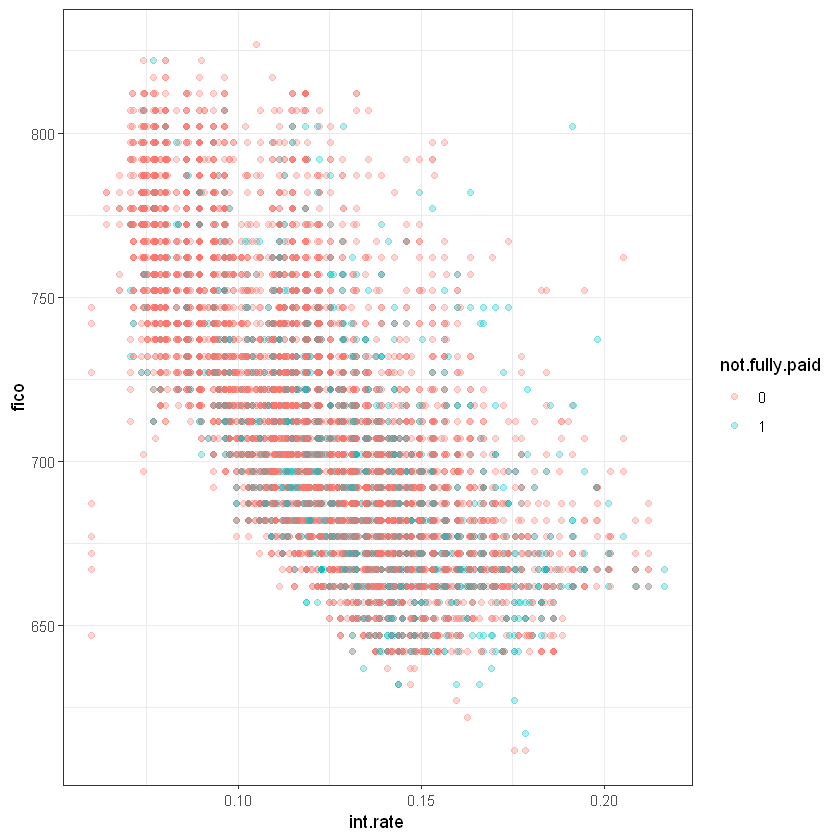

In [ ]:
ggplot(loans,aes(int.rate,fico)) +geom_point(aes(color=not.fully.paid),alpha=0.3) + theme_bw()

## Building the Model

Train and Test Sets
Split your data into training and test sets using the caTools library.

In [ ]:
library (caTools)
set.seed(101)
spl = sample.split(loans$not.fully.paid, 0.7)
train = subset (loans, spl = TRUE)
test = subset (loans, spl = FALSE)


In [ ]:
library (e1071)

use the svm() function to train a model on your training set.

In [ ]:
model <- svm (not.fully.paid ~ ., data = train)

In [ ]:
summary (model)

Use predict to predict new values from the test set using your model. Refer to the lecture on how to do this if you
don't remember

In [ ]:
predicted.values <- predict(model,test[1:13])

In [ ]:
table(predicted.values, test$not.fully.paid)

                
predicted.values    0    1
               0 8045 1532
               1    0    1

## Tuning the Model
You probably got some bad results! With the model classifying everything into one group (not fully paid i.e. 0)! This happenes when we use wrong gamma and cost values. This can be fixed by tuning the model. Let's tune our model to try to fix this.

Cost and gamma are important parameter for best fit model

cost: it allows SVM to have soft margine.
    In Hard margine, no training record can cross the margine between two classes.
    The cost value can allow soft margine, means SVM allows some examples to be allowed to be placed at the wrong side of the   margine. It helps the model to better fit.
    
gamma : If gamma is large variance is small. Large gamma leads to high bias and low variance & vice a versa.



Use the tune() function to test out different cost and gamma values. We will see how to tune these paramenters to choose best cost and gamma values.

In [ ]:
tune.results <- tune(svm,train.x=not.fully.paid~., data=train,kernel='radial',
ranges=list(cost=c(100,200), gamma=c(0.1)))

print (summary(tune.results))

This shows the best cost and gamma value. It takes long time to execute

In [ ]:
tune.results <- tune(svm,train.x=not.fully.paid~., data=train,kernel='radial',
ranges=list(cost=c(1,10), gamma=c(0.1,1)))
print(summary(tune.results))

In [ ]:
model <- svm(not.fully.paid ~ .,data=train,cost=10,gamma = 0.1)
predicted.values <- predict(model,test[1:13])
table(predicted.values,test$not.fully.paid)